# reboost ttbar(truth) to rest frame

In [1]:
import sys, os
sys.path.append(os.path.abspath("/afs/desy.de/user/z/zhuxinyu/public/mass_reco/"))
import numpy as np
import ROOT
from ROOT import TCanvas, TLegend, TFile, TPaveLabel, TPaveText, TTree, TLorentzVector, TH1D, TVectorT, gStyle, THStack, gPad, TH2D, TVector3
from ROOT import gROOT
import helper
import math
file = TFile("../output.root")
tree = file.Get("nominal")

Welcome to JupyROOT 6.24/08


In [2]:
theta_t_truth = TH1D ("theta_t_truth ","cos #theta_t truth" ,50 ,0 ,math.pi)
theta_t_truth_reboost = TH1D ("theta_t_truth_reboost "," cos theta_t truth reboost" ,50 ,0 ,math.pi)
theta_boost_2D = TH2D("#theta_t_2D", "#theta_t boosted vs. restframe", 50, 0, math.pi, 50 , 0 ,math.pi)

theta_top= TH1D ("theta_top_truth ","theta_top truth" ,50 ,0 ,math.pi)
theta_antitop = TH1D ("theta_antitop_truth ","theta_antitop truth" ,50 ,0 ,math.pi)


In [3]:
# for n in range(5):
for n in range(tree.GetEntries()):
    # print(n)
    tree.GetEntry(n)
    # 4vectors
    p4s_ttbar_beforeFSR = helper.p4_from_pt_eta_phi_m(tree, "MC_ttbar_beforeFSR")
    p4s_t_beforeFSR = helper.p4_from_pt_eta_phi_m(tree, "MC_t_beforeFSR")
    p4s_tbar_beforeFSR = helper.p4_from_pt_eta_phi_m(tree, "MC_tbar_beforeFSR")

    # boost vector
    BoostVector = p4s_ttbar_beforeFSR.BoostVector()

    # reboost every particle back
    p4s_t_beforeFSR_reboost = TLorentzVector(p4s_t_beforeFSR)
    p4s_t_beforeFSR_reboost.Boost(-BoostVector)

    p4s_tbar_beforeFSR_reboost = TLorentzVector(p4s_tbar_beforeFSR)
    p4s_tbar_beforeFSR_reboost.Boost(-BoostVector)

    # fill
    theta_t_truth.Fill(p4s_t_beforeFSR.Theta())
    theta_t_truth_reboost.Fill(p4s_t_beforeFSR_reboost.Theta())
    theta_boost_2D.Fill(p4s_t_beforeFSR.Theta(), p4s_t_beforeFSR_reboost.Theta())

    theta_t_truth.Fill(p4s_tbar_beforeFSR.Theta())
    theta_t_truth_reboost.Fill(p4s_tbar_beforeFSR_reboost.Theta())
    theta_boost_2D.Fill(p4s_tbar_beforeFSR.Theta(), p4s_tbar_beforeFSR_reboost.Theta())

    theta_top.Fill(p4s_t_beforeFSR_reboost.Theta())
    theta_antitop.Fill(p4s_tbar_beforeFSR_reboost.Theta())



In [4]:
fout = TFile("reboost_hists.root","recreate")
fout.cd()
theta_t_truth.Write()
theta_t_truth_reboost.Write()
theta_boost_2D.Write()
fout.Write()
fout.Close()

# load 

In [5]:
# # reload hists
# file = TFile("reboost_hists.root")
# theta_t_truth = file.Get("theta_t_truth")
# theta_t_truth_reboost = file.Get("theta_t_truth_reboost")
# theta_boost_2D = file.Get("#theta_t_2D")


# plots

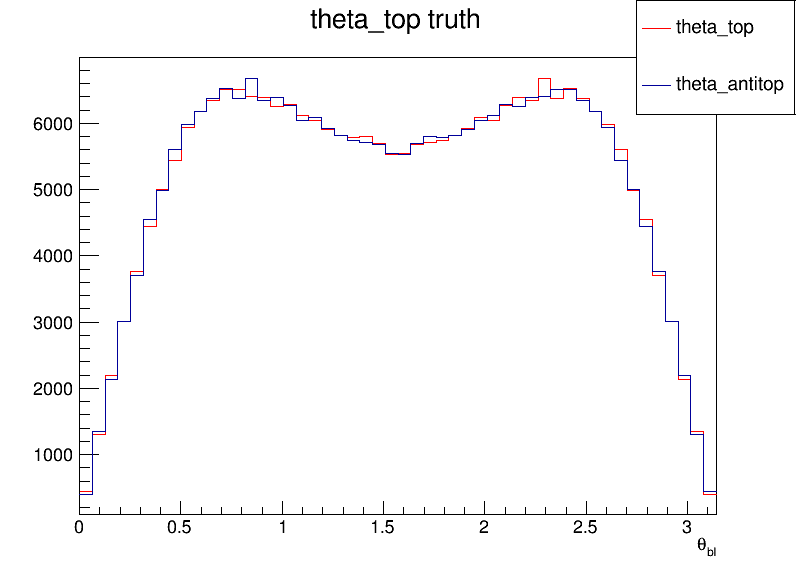

In [6]:
c0 = TCanvas('c0', 'canvas0', 0, 0, 800, 600 )
theta_top.SetStats(0)

theta_top.SetLineColorAlpha(2, 1)
theta_top.Draw()
theta_top.GetXaxis().SetTitle("#theta_{bl}")

theta_antitop.Draw('same')

leg = TLegend(0.8,0.8,1,1)
leg.AddEntry(theta_top,"theta_top", "l")
leg.AddEntry(theta_antitop,"theta_antitop", "l")

leg.Draw()

c0.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


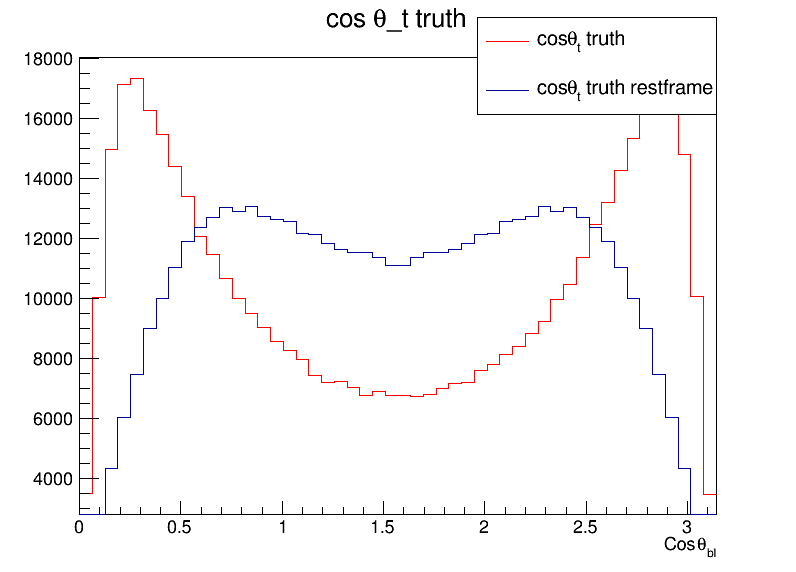

In [10]:
c1 = TCanvas('c1', 'canvas1', 0, 0, 800, 600 )
theta_t_truth.SetStats(0)

theta_t_truth.SetLineColorAlpha(2, 1)
theta_t_truth.Draw()
theta_t_truth.GetXaxis().SetTitle("Cos#theta_{bl}")

theta_t_truth_reboost.Draw('same')

leg = TLegend(0.6,0.8,0.9,0.97)
leg.AddEntry(theta_t_truth,"cos#theta_{t} truth", "l")
leg.AddEntry(theta_t_truth_reboost,"cos#theta_{t} truth restframe", "l")

leg.Draw()

c1.Draw()


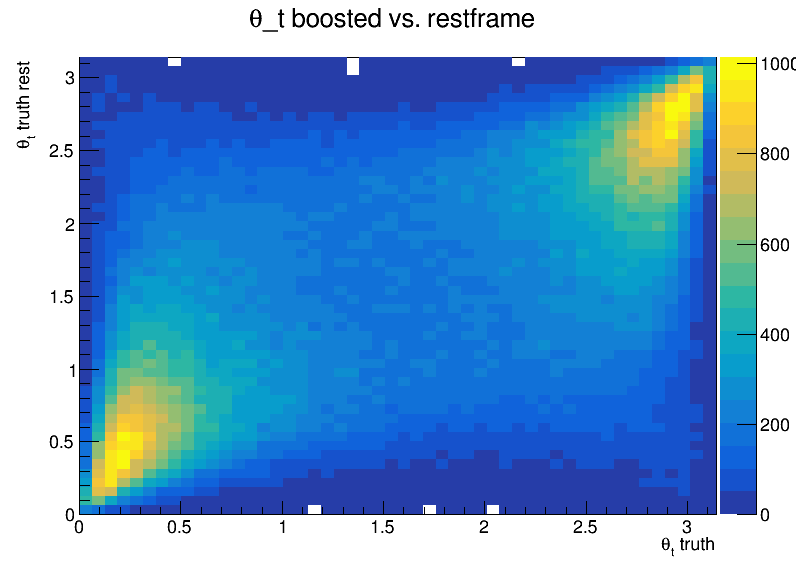

In [8]:
c2 = TCanvas('c2', 'canvas2', 0, 0, 800, 600 )

theta_boost_2D.Draw("COLZ")
# theta_boost_2D.Draw("")
theta_boost_2D.SetStats(0)
# c2.SetLogz()
theta_boost_2D.GetXaxis().SetTitle("#theta_{t} truth")
theta_boost_2D.GetYaxis().SetTitle("#theta_{t} truth rest")

c2.Draw()
